In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from make_figure_functions import inter_number
from make_figure_functions import get_inters
from make_figure_functions import inter_mix_number
from matplotlib.patches import Wedge
import matplotlib as mpl
import math
import os
def mushrooms(genes):
    from matplotlib.patches import Wedge
    import matplotlib as mpl
    import math
    cell_types = ['B_cells', 'Monocytes', 'NK_cells', 'Plasmablasts', 'T_cells', 'cDCs', 'pDCs']
    conditions = ['S_dengue', 'dengue']
    cmap = plt.cm.get_cmap('viridis')
    vmin, vmax = -1, 3
    threshold = 0.1
    frac = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/not_ID_ave/fra.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)
    avg = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/not_ID_ave/exp.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)

    fig = plt.figure(figsize=((1 + 0.8 * len(cell_types)) * 0.6, (1 + len(genes[0]) + len(genes[1])) * 0.6), dpi=300)

    grid = plt.GridSpec(len(genes[0] + genes[1]) , len(cell_types) + 1, wspace=0.1, hspace=0.1)
    up_ax = plt.subplot(grid[0: len(genes[0]), 0: len(cell_types)]) #length, width
    down_ax = plt.subplot(grid[len(genes[0]): len(genes[0] + genes[1]), 0: len(cell_types)])
    
    
    size_bar = plt.subplot(grid[1: 6, len(cell_types): len(cell_types) + 1])

    datap = []
    for genesi, ax in zip(genes, [up_ax, down_ax]):
        for i, cst in enumerate(cell_types):
            for j, gene in enumerate(genesi):
                avgs = []
                for k, cond in enumerate(conditions):
                    fr = frac.loc[(cst, cond, gene)]
                    av = np.log10(avg.loc[(cst, cond, gene)] + 0.1)
                    avgs.append(av)

                    r = 0.5 * fr**0.3
                    color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                    theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                    datap.append({
                        'r': r,
                        'facecolor': color,
                        'center': (i, j),
                        'theta': (theta0, theta1),
                        'ax': ax,
                    })
                if avgs[0] - avgs[1] > threshold:
                    datap[-2]['edgecolor'] = 'red'
                    datap[-1]['edgecolor'] = 'none'
                elif avgs[0] - avgs[1] < -threshold:
                    datap[-1]['edgecolor'] = 'red'
                    datap[-2]['edgecolor'] = 'none'
                else:
                    datap[-1]['edgecolor'] = 'none'
                    datap[-2]['edgecolor'] = 'none' 

        ax.set_yticks(np.arange(len(genesi)))
        ax.set_yticklabels(genesi)
        ax.set_ylim(-0.6, len(genesi) - 0.4)        
        ax.set_xticks(np.arange(len(cell_types)))
        ax.set_xticklabels([x.replace('_', ' ') for x in cell_types], rotation=90)
        ax.set_xlim(-0.6, len(cell_types) - 0.4)

    for datum in datap:
        ax = datum['ax']
        r = datum['r']
        color = datum['facecolor']
        center = datum['center']
        theta0, theta1 = datum['theta']
        #ec = datum['edgecolor']

        h = Wedge(
            center, r, theta0, theta1, facecolor=color,
        )#, edgecolor=ec
        ax.add_artist(h)
        ax.set_aspect(1)

    up_ax.set_xticklabels([])

    size_bar.set_ylim(-0.6, 5 - 0.4)        
    c = [(0.5, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        size_bar.add_artist(e)
    size_bar.set_aspect(1)
    size_bar.set_yticks([])
    size_bar.set_yticks(range(5))
    size_bar.set_yticklabels(['5', '10', '20', '40', '80'])
    size_bar.yaxis.tick_right()
    size_bar.yaxis.set_label_position('right')
    size_bar.set_ylabel('Gene exp frac')
    size_bar.set_xticks([])
    size_bar.spines['bottom'].set_visible(False)
    size_bar.spines['top'].set_visible(False)
    size_bar.spines['right'].set_visible(False)
    size_bar.spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax) 
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([1.05, 0.35, 0.02, 0.25])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=position, ax=down_ax, label='Gene exp \n(log10[cpm+0.1])')

    fig.tight_layout()
    return {'fig': fig, 'ax': ax}

<ipython-input-75-b0866ec313d8>:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 1188x1260 with 4 Axes>, 'ax': <AxesSubplot:>}

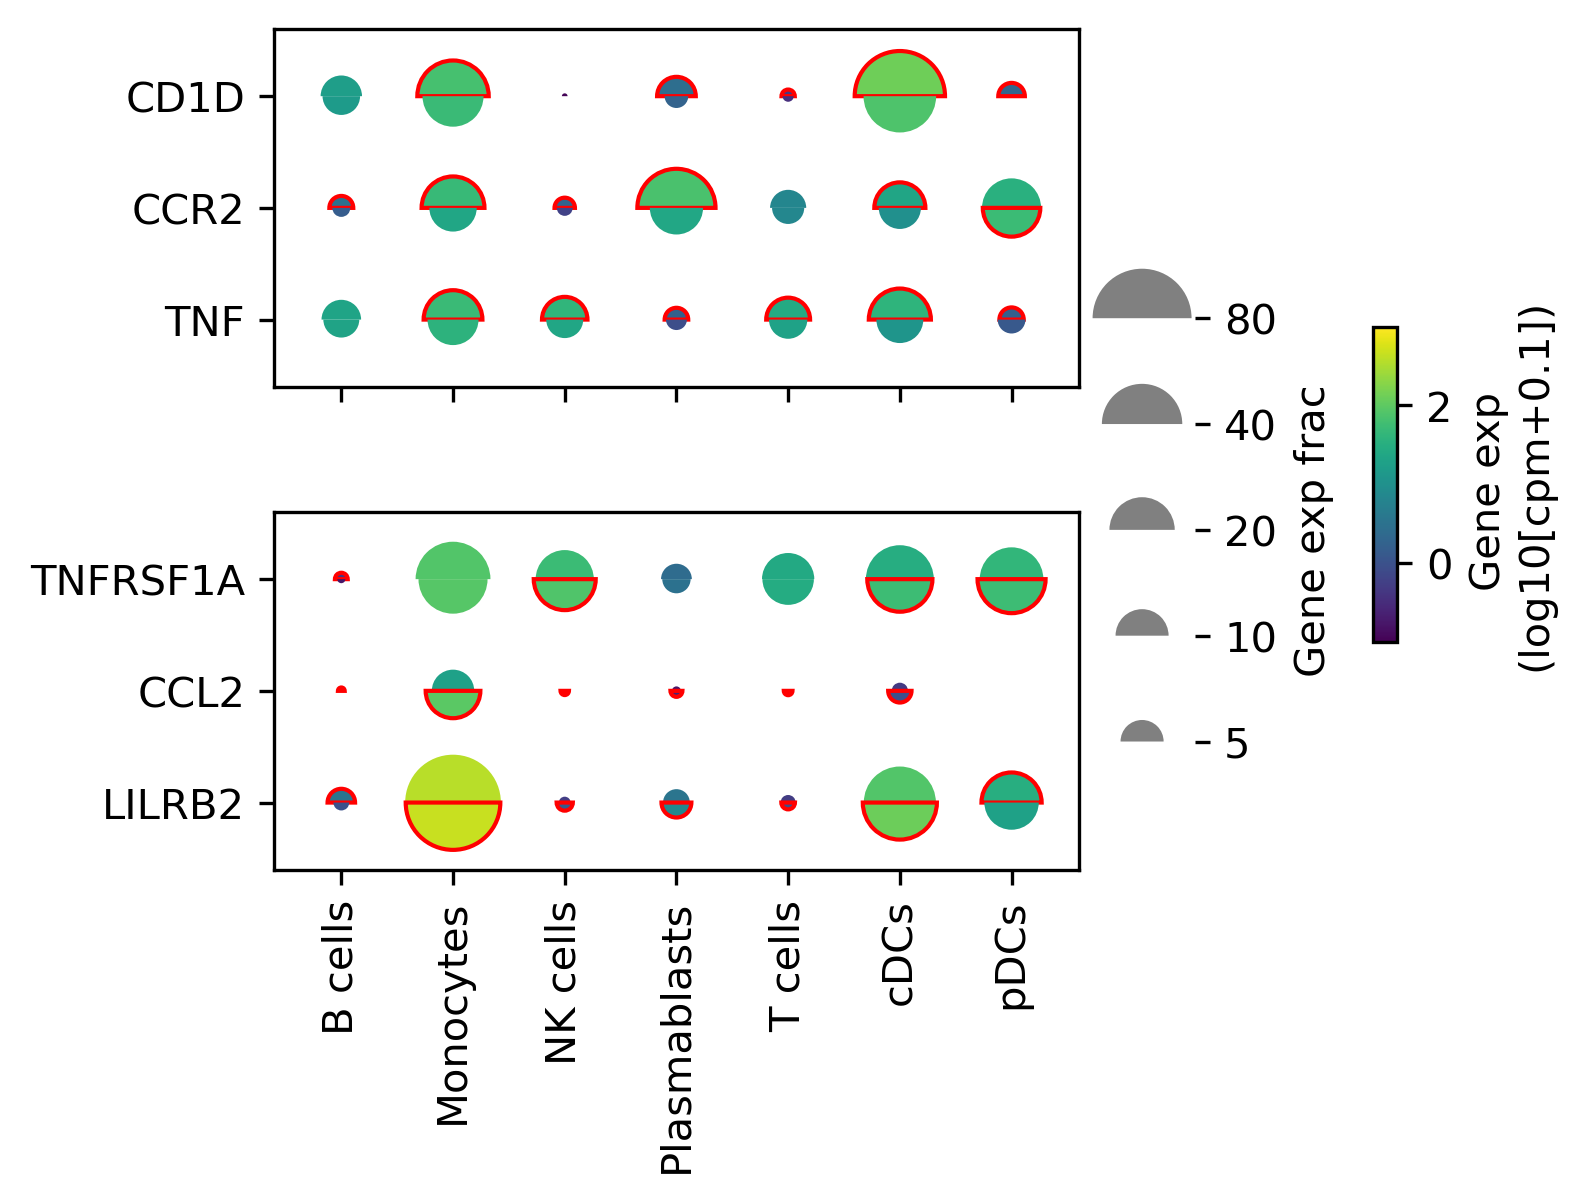

In [78]:
#genes = [
#    ['ICAM1', 'ADORA2A', 'GAS6'],
#    ['AXL', 'ENTPD1', 'ITGAM'],   
#]

#genes = [
#    ['FASLG', 'TNFSF10', 'CLEC2D'],
#    ['KLRB1', 'TNFRSF10C', 'TNFRSF1A'],   
#]

#genes = [
#    ['TNF', 'CCR2', 'CD1D'],
#    ['LILRB2', 'CCL2', 'TNFRSF1A'],   
#]

mushrooms(genes)

<ipython-input-8-c7a3a50a1137>:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 1188x1980 with 4 Axes>, 'ax': <AxesSubplot:>}

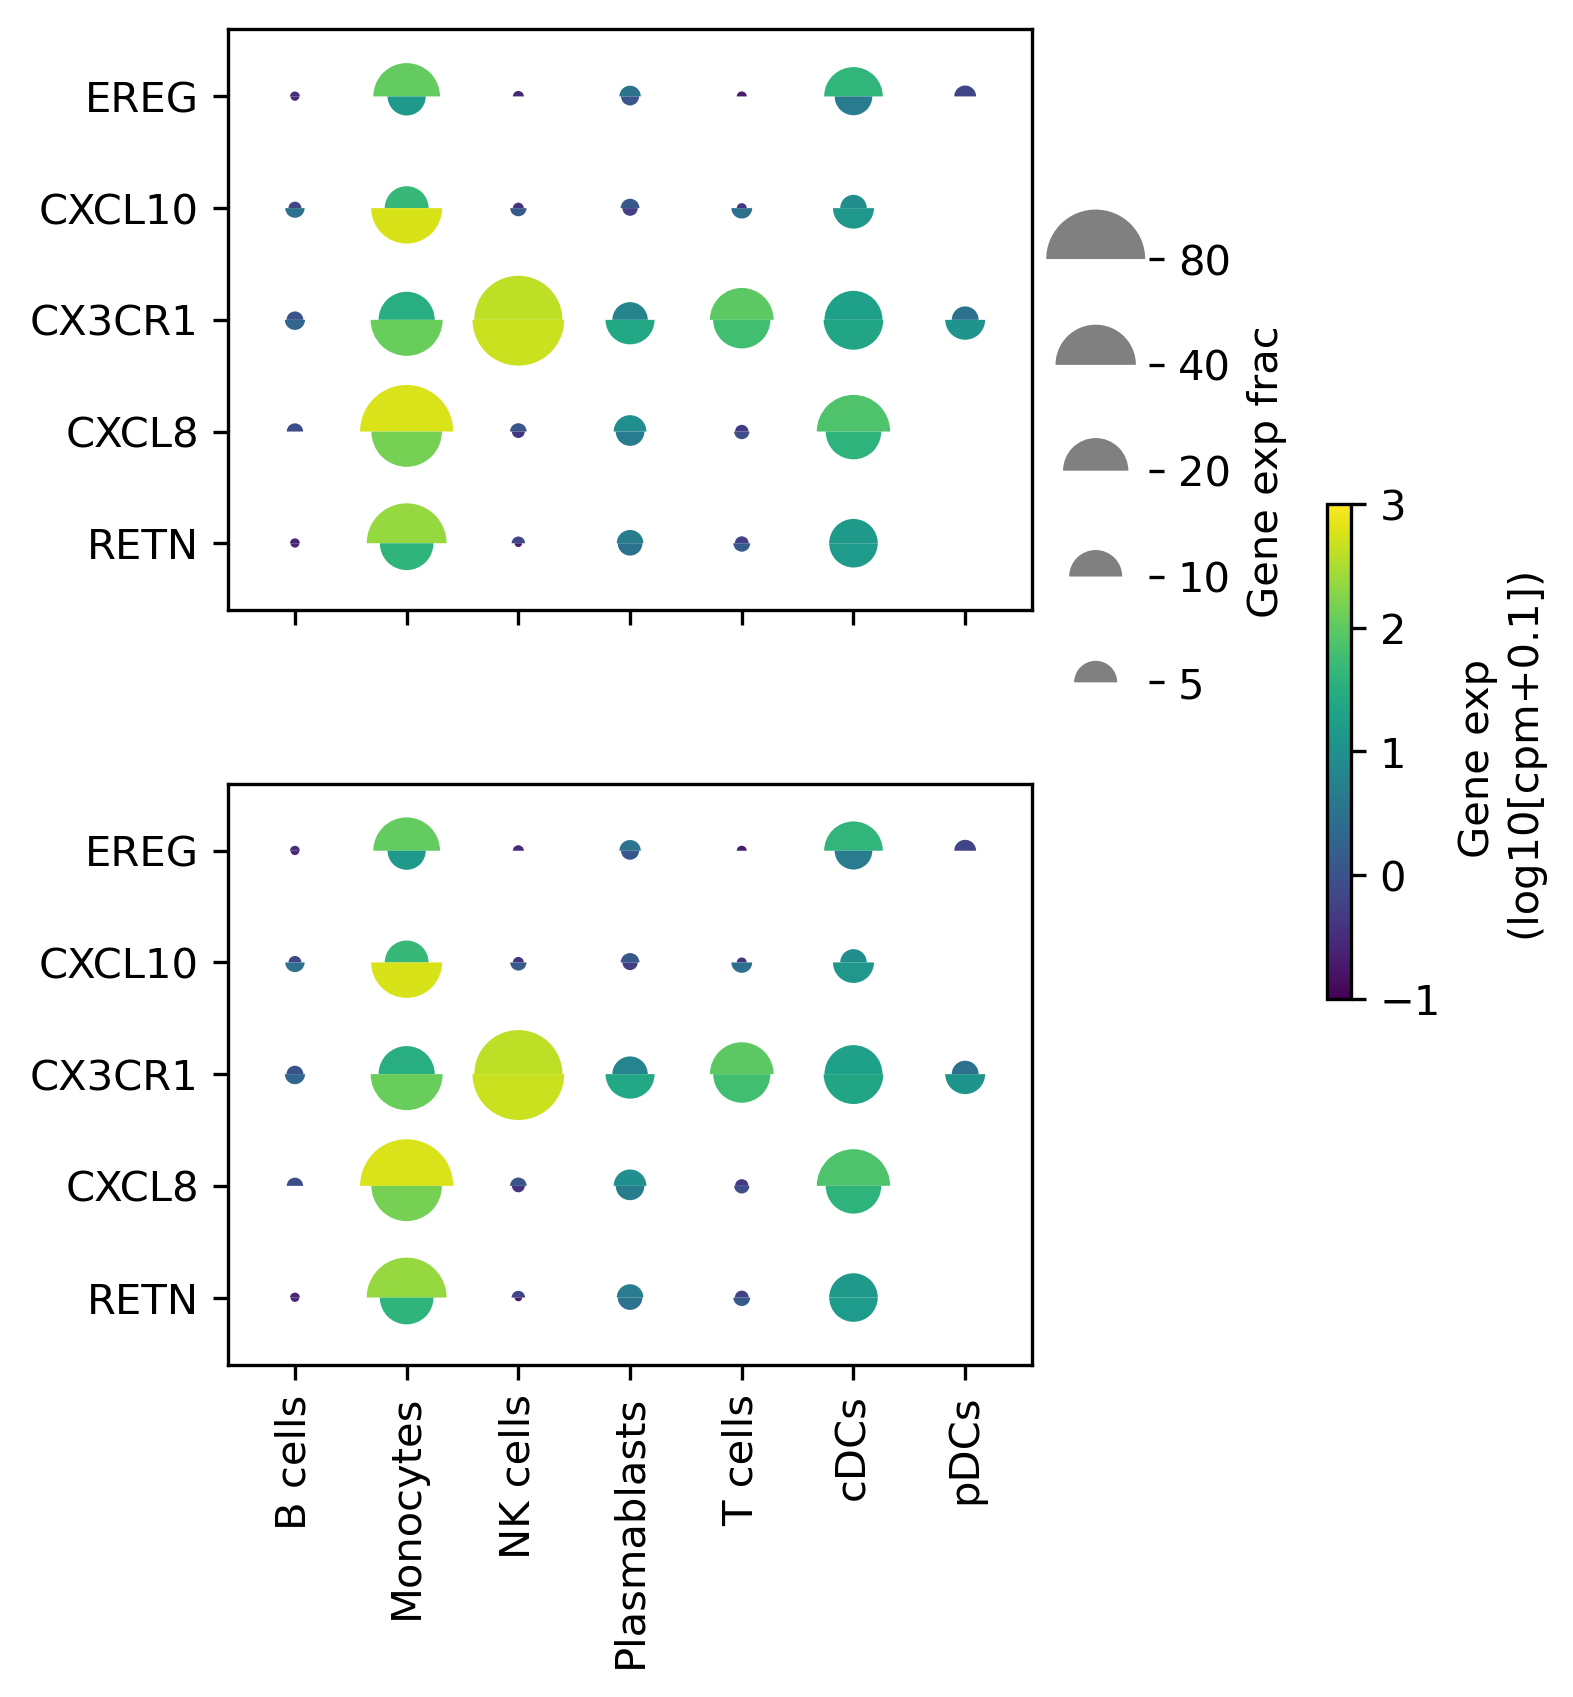

In [219]:
#genes = [
#    ['CXCR3', 'CCR2', 'XCR1', 'TNFRSF14', 'CD86'],
#    ['CXCL10', 'CCL8', 'CCL2', 'XCL1', 'CD160', 'CTLA4'],  
#]

genes = [
    ['RETN',  'CXCL8', 'CX3CR1', 'CXCL10', 'EREG'], # 'CD86'
    ['RETN',  'CXCL8', 'CX3CR1', 'CXCL10', 'EREG'],  #  
]

mushrooms(genes)

<ipython-input-8-c7a3a50a1137>:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 1188x1080 with 4 Axes>, 'ax': <AxesSubplot:>}

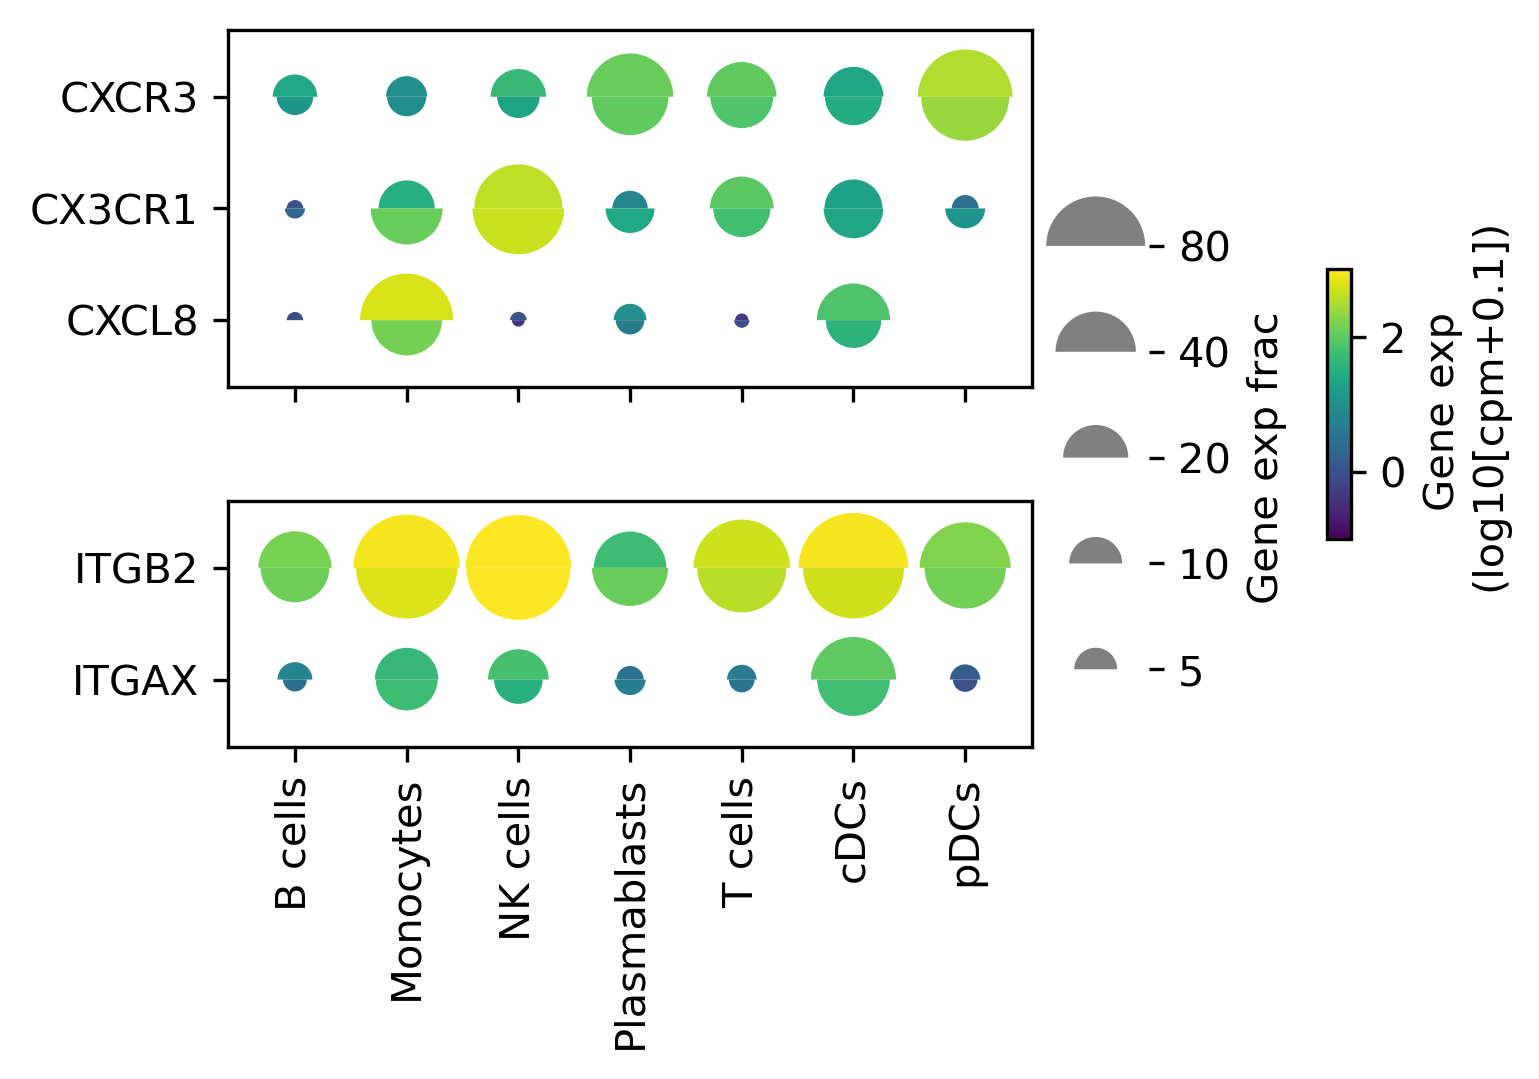

In [209]:
 genes = [
    ['CXCL8', 'CX3CR1', 'CXCR3'], # 'CD86'
    ['ITGAX', 'ITGB2'],  #  
]

mushrooms(genes)

<ipython-input-114-ef3b92e4d893>:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 588x540 with 4 Axes>,
 'ax': [<AxesSubplot:title={'center':'CD86 CTLA4'}>,
  <AxesSubplot:title={'center':'CD86 CTLA4'}>]}

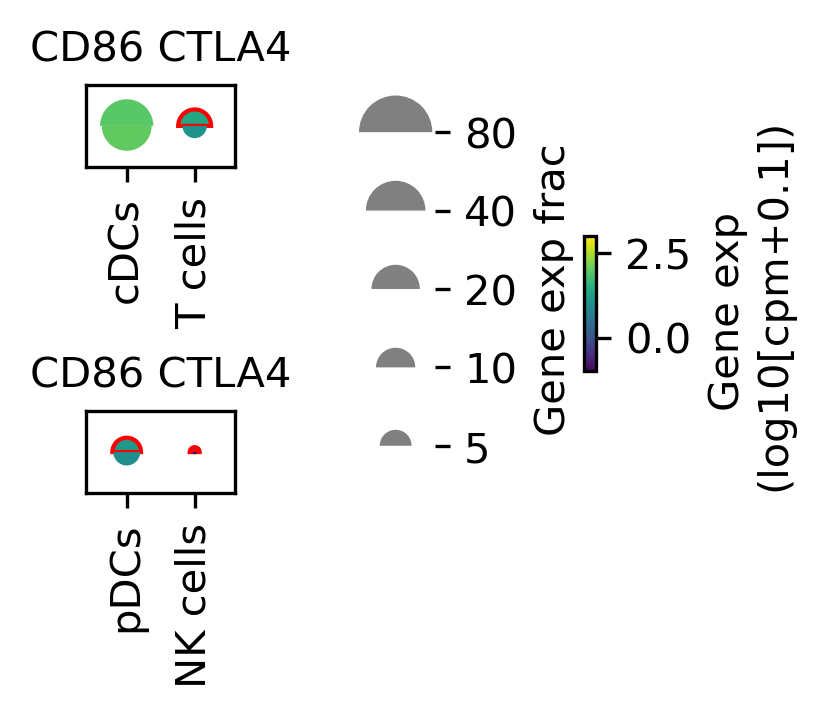

In [114]:
genes = [
    {'CD86': 'cDCs', 'CTLA4': 'T_cells'},
    {'CD86': 'pDCs', 'CTLA4': 'NK_cells'},  
]

def s_mushrooms(genes):
    from matplotlib.patches import Wedge
    import matplotlib as mpl
    import math
    cell_types = ['B_cells', 'Monocytes', 'NK_cells', 'Plasmablasts', 'T_cells', 'cDCs', 'pDCs']
    conditions = ['S_dengue', 'dengue']
    cmap = plt.cm.get_cmap('viridis')
    vmin, vmax = -1, 3
    threshold = 0.1
    frac = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/not_ID_ave/fra.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)
    avg = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/not_ID_ave/exp.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)

    fig = plt.figure(figsize=(1 + 0.8 * 2 * 0.6, (1 + len(genes)) * 0.6), dpi=300)

    grid = plt.GridSpec(len(genes) , 3, wspace=0.1, hspace=3)
    
    axs = []
    for i in range(len(genes)):
         axs.append(plt.subplot(grid[i: i + 1, 0: 2])) # length, width

    size_bar = plt.subplot(grid[0: 5, 2: 3])

    datap = []
    for genesi, ax in zip(genes, axs):
        cts = list(genesi.values())
        gs = list(genesi.keys())
        for i, (cst, gene) in enumerate(zip(cts, gs)):
            avgs = []
            for k, cond in enumerate(conditions):
                fr = frac.loc[(cst, cond, gene)]
                av = np.log10(avg.loc[(cst, cond, gene)] + 0.1)
                avgs.append(av)

                r = 0.5 * fr**0.3
                color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                datap.append({
                    'r': r,
                    'facecolor': color,
                    'center': (i, 0),
                    'theta': (theta0, theta1),
                    'ax': ax,
                    'title': list(genesi.keys())[0] + ' ' + list(genesi.keys())[1]
                })
            if avgs[0] - avgs[1] > threshold:
                datap[-2]['edgecolor'] = 'red'
                datap[-1]['edgecolor'] = 'none'
            elif avgs[0] - avgs[1] < -threshold:
                datap[-1]['edgecolor'] = 'red'
                datap[-2]['edgecolor'] = 'none'
            else:
                datap[-1]['edgecolor'] = 'none'
                datap[-2]['edgecolor'] = 'none' 

        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_ylim(-0.6, 1 - 0.4)        
        ax.set_xticks(np.arange(2))
        ax.set_xticklabels([x.replace('_', ' ') for x in genesi.values()], rotation=90)
        ax.set_xlim(-0.6, 2 - 0.4)

    for datum in datap:
        ax = datum['ax']
        r = datum['r']
        color = datum['facecolor']
        center = datum['center']
        theta0, theta1 = datum['theta']
        ec = datum['edgecolor']
        title = datum['title']

        h = Wedge(
            center, r, theta0, theta1, facecolor=color, edgecolor=ec
        )#
        ax.add_artist(h)
        ax.set_aspect(1)
        ax.set_title(title, fontsize=10)

    #axs[: -1].set_xticklabels([])

    size_bar.set_ylim(-0.6, 5 - 0.4)        
    c = [(0.5, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        size_bar.add_artist(e)
    size_bar.set_aspect(1)
    size_bar.set_yticks([])
    size_bar.set_yticks(range(5))
    size_bar.set_yticklabels(['5', '10', '20', '40', '80'])
    size_bar.yaxis.tick_right()
    size_bar.yaxis.set_label_position('right')
    size_bar.set_ylabel('Gene exp frac')
    size_bar.set_xticks([])
    size_bar.spines['bottom'].set_visible(False)
    size_bar.spines['top'].set_visible(False)
    size_bar.spines['right'].set_visible(False)
    size_bar.spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax) 
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([1.1, 0.35, 0.02, 0.25])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=position, ax=axs[-1], label='Gene exp \n(log10[cpm+0.1])')

    fig.tight_layout()
    return {'fig': fig, 'ax': axs}
s_mushrooms(genes)

In [167]:
def s_mushrooms(genes):
    from matplotlib.patches import Wedge
    import matplotlib as mpl
    import math
    conditions = ['S_dengue', 'dengue']
    cmap = plt.cm.get_cmap('viridis')
    vmin, vmax = -1, 3
    threshold = 0.1
    frac = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/not_ID_ave/fra.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)
    avg = pd.read_csv('/home/yike/phd/dengue/data/excels/log2_fc/S_dengue_vs_dengue/not_ID_ave/exp.tsv', index_col=['cell_type', 'condition', 'gene'], squeeze=True)
    
    yl = sum([len(genesi) for genesi in genes])
    fig = plt.figure(figsize=((1 + 0.8 * 2) * 0.6, (1 + yl)* 0.6), dpi=300)

    grid = plt.GridSpec(yl , 2, wspace=0.1, hspace=0.1)
    
    axs = []
    for i in range(len(genes)):
         axs.append(plt.subplot(grid[sum(len(genesi) for genesi in genes[: i]): sum(len(genesi) for genesi in genes[: i+1]), 0: 1]))
    size_bar = plt.subplot(grid[0: 5, 1: 2])

    datap = []
    for genesi, ax in zip(genes, axs):
        cts = list(genesi.values())
        gs = list(genesi.keys())
        for i, (cst, gene) in enumerate(zip(cts, gs)):
            avgs = []
            for k, cond in enumerate(conditions):
                fr = frac.loc[(cst, cond, gene)]
                av = np.log10(avg.loc[(cst, cond, gene)] + 0.1)
                avgs.append(av)

                r = 0.5 * fr**0.3
                color = cmap((min(vmax, av) - vmin) / (vmax - vmin))
                theta0, theta1 = 180 * (k > 0), 180 + 180 * (k > 0)
                datap.append({
                    'r': r,
                    'facecolor': color,
                    'center': (0, i),
                    'theta': (theta0, theta1),
                    'ax': ax,
                    #'title': list(genesi.keys())[0] + ' ' + list(genesi.keys())[1]
                })
            if avgs[0] - avgs[1] > threshold:
                datap[-2]['edgecolor'] = 'red'
                datap[-1]['edgecolor'] = 'none'
            elif avgs[0] - avgs[1] < -threshold:
                datap[-1]['edgecolor'] = 'red'
                datap[-2]['edgecolor'] = 'none'
            else:
                datap[-1]['edgecolor'] = 'none'
                datap[-2]['edgecolor'] = 'none' 

        ax.set_yticks(np.arange(len(genesi)))
        ax.set_yticklabels([gene + ' in\n' + cst.replace('_', ' ') for cst, gene in zip(cts, gs)])
        ax.set_ylim(-0.6, len(genesi) - 0.4)        
        ax.set_xticks([])
        ax.set_xlim(-0.6, 1 - 0.4)

    for datum in datap:
        ax = datum['ax']
        r = datum['r']
        color = datum['facecolor']
        center = datum['center']
        theta0, theta1 = datum['theta']
        ec = datum['edgecolor']

        h = Wedge(
            center, r, theta0, theta1, facecolor=color, edgecolor=ec
        )
        ax.add_artist(h)
        ax.set_aspect(1)

    size_bar.set_ylim(-0.6, 5 - 0.4)        
    c = [(0.5, i) for i in range(5)]
    radius = [0.5 * fr**0.3 for fr in [0.05, 0.1, 0.2, 0.4, 0.8]]
    for c, r in zip(c, radius):
        e = Wedge(c, r, 0, 180, facecolor='gray',)
        size_bar.add_artist(e)
    size_bar.set_aspect(1)
    size_bar.set_yticks([])
    size_bar.set_yticks(range(5))
    size_bar.set_yticklabels(['5', '10', '20', '40', '80'])
    size_bar.yaxis.tick_right()
    size_bar.yaxis.set_label_position('right')
    size_bar.set_ylabel('Gene exp frac')
    size_bar.set_xticks([])
    size_bar.spines['bottom'].set_visible(False)
    size_bar.spines['top'].set_visible(False)
    size_bar.spines['right'].set_visible(False)
    size_bar.spines['left'].set_visible(False)

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax) 
    cmap = plt.cm.get_cmap('viridis')
    position = fig.add_axes([0.7, 0.2, 0.05, 0.25])
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=position, ax=axs[-1], label='Gene exp \n(log10[cpm+0.1])')

    fig.tight_layout()
    return {'fig': fig, 'ax': axs}

<ipython-input-167-e22ee7dfec32>:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


{'fig': <Figure size 468x1800 with 6 Axes>,
 'ax': [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]}

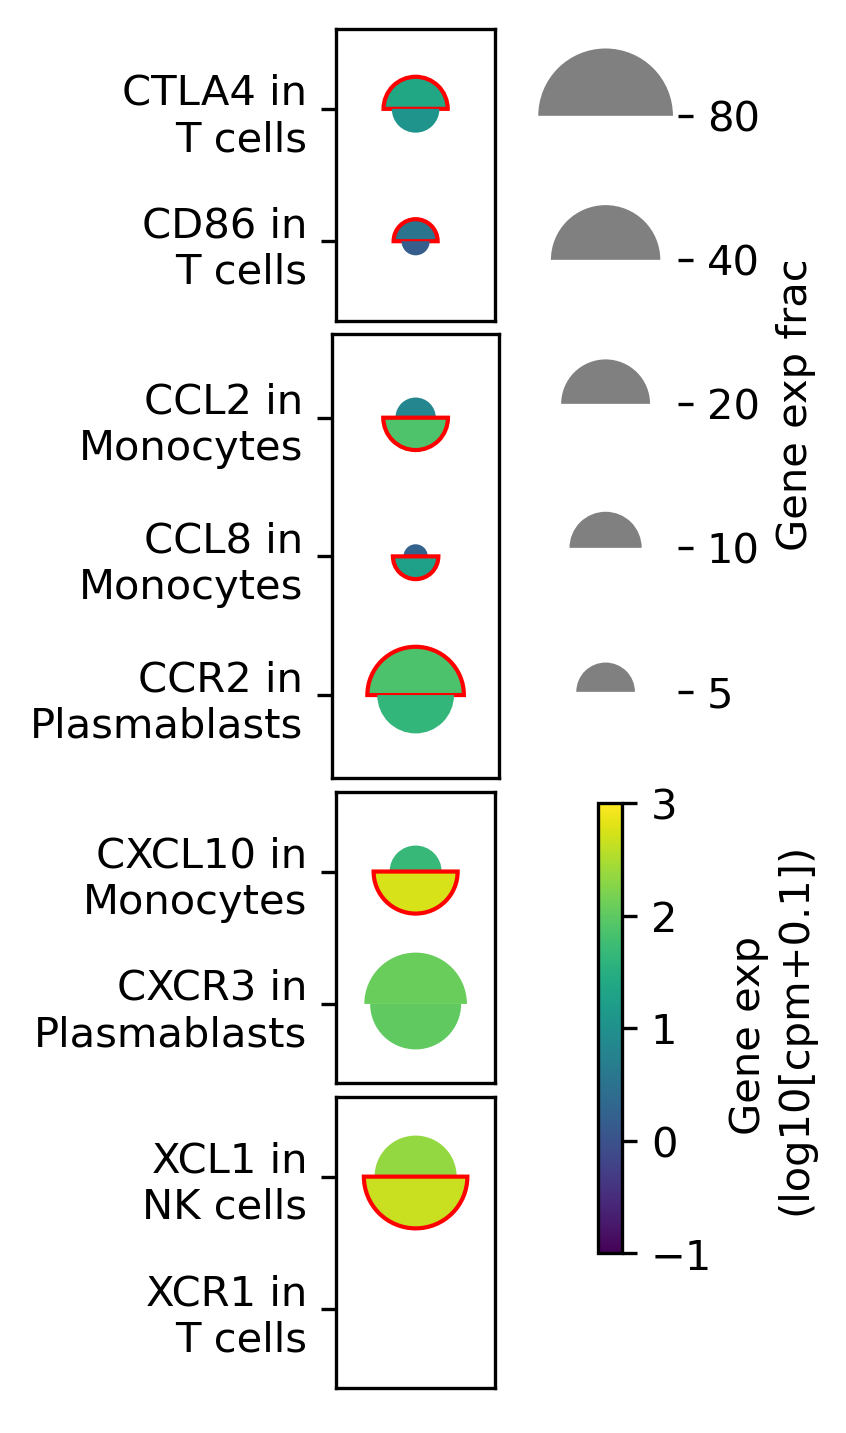

In [179]:
genes = [
    {'CD86': 'T_cells', 'CTLA4': 'T_cells'},
    {'CCR2': 'Plasmablasts', 'CCL8': 'Monocytes', 'CCL2': 'Monocytes'},
    {'CXCR3': 'Plasmablasts', 'CXCL10': 'Monocytes'},
    {'XCR1': 'cDCs', 'XCL1': 'NK_cells'},
    
]

s_mushrooms(genes)